# Hand Tracking Model

## Load imports

In [22]:
import cv2
import mediapipe as mp
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

## Load file paths

In [6]:
dataset = 'gestures_src/gesture_data.csv'

dataset_open = 'gestures_src/gesture_open'
dataset_close = 'gestures_src/gesture_close'
dataset_pointer = 'gestures_src/gesture_pointer'

## Number of classes

In [7]:
NUM_CLASSES = 3

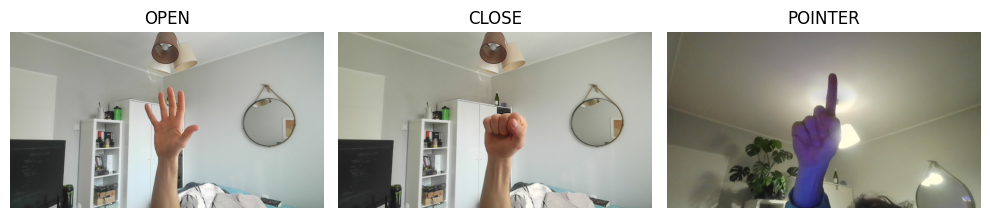

In [9]:
open_image = cv2.imread(os.path.join(dataset_open, os.listdir(dataset_open)[0]))
close_image = cv2.imread(os.path.join(dataset_close, os.listdir(dataset_close)[0]))
pointer_image = cv2.imread(os.path.join(dataset_pointer, os.listdir(dataset_pointer)[0]))

fig, axs = plt.subplots(1, 3, figsize=(10, 8))

axs[0].imshow(cv2.cvtColor(open_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('OPEN')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(close_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('CLOSE')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(pointer_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('POINTER')
axs[2].axis('off')

plt.tight_layout()
plt.show()

## Extract function

In [11]:
def extract_landmarks_second(image, hand):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    result = hand.process(image_rgb)

    landmarks = []

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                h, w, _ = image.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                landmarks.extend([cx, cy])
    landmarks = np.array(landmarks)
    if len(landmarks) < 42:
        landmarks = np.pad(landmarks, (0, 42 - len(landmarks)), 'constant')
    elif len(landmarks) > 42:
        landmarks = landmarks[:42]
    return landmarks

## Landmark visualization

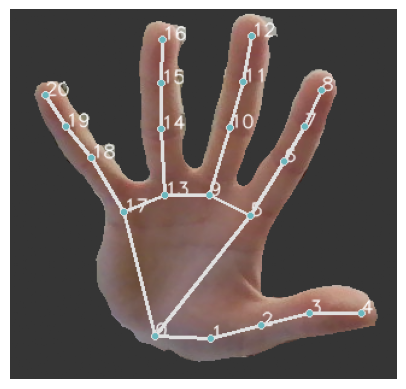

In [14]:
def display_image(image_path):
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

display_image('gestures_src/landmark_example.png')

## Extract landmarks

In [18]:
landmarks = []
labels = []
images = []
image_names = []

# Foldery
sources = {
    "OPEN": dataset_open,
    "CLOSE": dataset_close,
    "POINTER": dataset_pointer
}

# MediaPipe
mp_hands = mp.solutions.hands
hand = mp_hands.Hands(static_image_mode=True)

def extract_landmarks_second(image, hand):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hand.process(image_rgb)
    landmark_list = []

    if result.multi_hand_landmarks:
        for lm in result.multi_hand_landmarks[0].landmark:
            landmark_list.extend([lm.x, lm.y, lm.z])
    else:
        # Jeśli nie wykryto dłoni, zwracamy pusty wektor (lub możesz pominąć)
        landmark_list = [0.0] * 63

    return landmark_list

# Przetwarzanie obrazów
for label, folder_path in sources.items():
    for image_name in os.listdir(folder_path):
        if not image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path)

        if img is None:
            print(f"[!] Nie można wczytać: {image_path}")
            continue

        images.append(img)
        image_names.append(image_name)

        landmark = extract_landmarks_second(img, hand)
        landmarks.append(landmark)
        labels.append(label)

        print(f"[✓] {label} - {image_name}")


I0000 00:00:1745450328.808258 1627423 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1745450328.822808 1639197 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745450328.830332 1639197 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[✓] OPEN - o_0.jpg
[✓] OPEN - o_1.jpg
[✓] OPEN - o_10.jpg
[✓] OPEN - o_100.jpg
[✓] OPEN - o_101.jpg
[✓] OPEN - o_102.jpg
[✓] OPEN - o_103.jpg
[✓] OPEN - o_104.jpg
[✓] OPEN - o_105.jpg
[✓] OPEN - o_106.jpg
[✓] OPEN - o_107.jpg
[✓] OPEN - o_108.jpg
[✓] OPEN - o_109.jpg
[✓] OPEN - o_11.jpg
[✓] OPEN - o_110.jpg
[✓] OPEN - o_111.jpg
[✓] OPEN - o_112.jpg
[✓] OPEN - o_113.jpg
[✓] OPEN - o_114.jpg
[✓] OPEN - o_115.jpg
[✓] OPEN - o_116.jpg
[✓] OPEN - o_117.jpg
[✓] OPEN - o_118.jpg
[✓] OPEN - o_119.jpg
[✓] OPEN - o_12.jpg
[✓] OPEN - o_120.jpg
[✓] OPEN - o_121.jpg
[✓] OPEN - o_122.jpg
[✓] OPEN - o_123.jpg
[✓] OPEN - o_124.jpg
[✓] OPEN - o_125.jpg
[✓] OPEN - o_126.jpg
[✓] OPEN - o_127.jpg
[✓] OPEN - o_128.jpg
[✓] OPEN - o_129.jpg
[✓] OPEN - o_13.jpg
[✓] OPEN - o_130.jpg
[✓] OPEN - o_131.jpg
[✓] OPEN - o_132.jpg
[✓] OPEN - o_133.jpg
[✓] OPEN - o_134.jpg
[✓] OPEN - o_135.jpg
[✓] OPEN - o_136.jpg
[✓] OPEN - o_137.jpg
[✓] OPEN - o_138.jpg
[✓] OPEN - o_139.jpg
[✓] OPEN - o_14.jpg
[✓] OPEN - o_140.jpg
[

In [19]:
X_dataset = np.array(landmarks)
Y_dataset_str = np.array(labels)

In [20]:
print("First 5 rows of dataset X:")
print(X_dataset[:5])

print("First 5 rows of dataset Y:")
print(Y_dataset_str[:5])

First 5 rows of dataset X:
[[ 4.94490385e-01  7.08070874e-01  2.87807040e-07  5.24123311e-01
   6.77798867e-01 -3.23037617e-02  5.46673596e-01  6.30879700e-01
  -4.78203781e-02  5.65645099e-01  5.80637634e-01 -6.00308850e-02
   5.90096772e-01  5.47133982e-01 -7.12115094e-02  5.35079658e-01
   5.19204438e-01 -2.11148933e-02  5.43095827e-01  4.46356773e-01
  -3.30727659e-02  5.42946279e-01  3.96975815e-01 -4.42748591e-02
   5.41885972e-01  3.54898810e-01 -5.32388277e-02  5.12904584e-01
   5.11223435e-01 -1.45910168e-02  5.15517175e-01  4.32068616e-01
  -2.44860929e-02  5.13124883e-01  3.79938483e-01 -3.45138870e-02
   5.10857046e-01  3.33016038e-01 -4.21922654e-02  4.92138714e-01
   5.21299839e-01 -1.18732955e-02  4.87730592e-01  4.49156582e-01
  -2.33662054e-02  4.82886434e-01  4.03314441e-01 -3.29686701e-02
   4.79939044e-01  3.63484770e-01 -3.96450609e-02  4.71352041e-01
   5.46041608e-01 -1.23949684e-02  4.54037011e-01  4.95309711e-01
  -2.50629317e-02  4.42519903e-01  4.60195422e-01

In [21]:
# Check unique values of Y dataset
print("Label set unique values: ", list(np.unique(Y_dataset_str)))

Label set unique values:  ['CLOSE', 'OPEN', 'POINTER']


## Export data to CSV

In [23]:
df = pd.DataFrame(X_dataset)
df['label'] = Y_dataset_str

df.to_csv('gestures_dataset.csv', index=False)

print("✅ Dane zapisane do gestures_dataset.csv")

✅ Dane zapisane do gestures_dataset.csv
